In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

11/13/2018 18:47:24 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
11/13/2018 18:47:26 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
11/13/2018 18:47:28 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

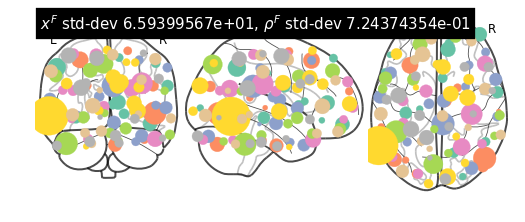

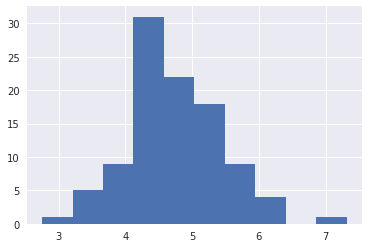

(<nilearn.plotting.displays.OrthoProjector at 0x7f2c1b2ab080>,
 tensor([[-54.1083, -53.8766,  44.6791],
         [  4.7424,  11.1460,   5.3356],
         [-34.0540, -25.5118,  -8.0737],
         [ 16.4721, -67.3856,  -4.5142],
         [ 49.9143, -55.8937,  48.7343],
         [-55.8937,  17.4322,   9.2333],
         [ 43.8505,  57.1904, -14.8188],
         [-50.6612,  35.5202, -10.7299],
         [ 25.9008, -92.4590,   2.2311],
         [ 62.3460,  -3.7408,  24.9357],
         [-19.3453, -21.5363,  38.9014],
         [ 10.4017,  41.2520,   7.7582],
         [ 11.3263,  47.6470,  54.6465],
         [  7.1284, -12.2519, -37.1148],
         [ 20.4403,   0.8432,  61.7985],
         [-45.9858, -74.5261, -36.0323],
         [ 63.8020, -24.1331,   2.5842],
         [-34.1101, -75.1812,  49.1821],
         [-29.0922,  64.2130,  19.8002],
         [ 47.0925, -82.0773,  24.9031],
         [-59.8592, -40.2972,  12.9845],
         [-22.7052, -89.5719,  25.2884],
         [ 37.9554, -27.0040, -31.6

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.average_reconstruction_error()

11/13/2018 18:49:39 Average reconstruction error (MSE): 1.11760015e+00
11/13/2018 18:49:39 Average data norm (Euclidean): 9.92958210e-01
11/13/2018 18:49:39 Percent average reconstruction error: 0.380581


(1.1176001522557617, 0.9929582103611018, 0.0038058139749735853)

In [9]:
losses = dtfa.train(num_steps=5000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=8, patience=500)

11/13/2018 18:49:40 [Epoch 1] (1073ms) Posterior free-energy 1.44562032e+08 = KL from prior 2.19225684e+03 - log-likelihood -1.44559840e+08
11/13/2018 18:49:41 [Epoch 2] (1031ms) Posterior free-energy 1.45093056e+08 = KL from prior 2.51112109e+03 - log-likelihood -1.45090544e+08
11/13/2018 18:49:42 [Epoch 3] (966ms) Posterior free-energy 1.42902048e+08 = KL from prior 4.42437793e+03 - log-likelihood -1.42897616e+08
11/13/2018 18:49:43 [Epoch 4] (972ms) Posterior free-energy 1.42738208e+08 = KL from prior 5.11667090e+03 - log-likelihood -1.42733088e+08
11/13/2018 18:49:44 [Epoch 5] (949ms) Posterior free-energy 1.43880336e+08 = KL from prior 5.51417676e+03 - log-likelihood -1.43874816e+08
11/13/2018 18:49:45 [Epoch 6] (946ms) Posterior free-energy 1.41429968e+08 = KL from prior 2.10134277e+04 - log-likelihood -1.41408960e+08
11/13/2018 18:49:46 [Epoch 7] (950ms) Posterior free-energy 1.41053552e+08 = KL from prior 1.12697920e+04 - log-likelihood -1.41042288e+08
11/13/2018 18:49:47 [Epoc

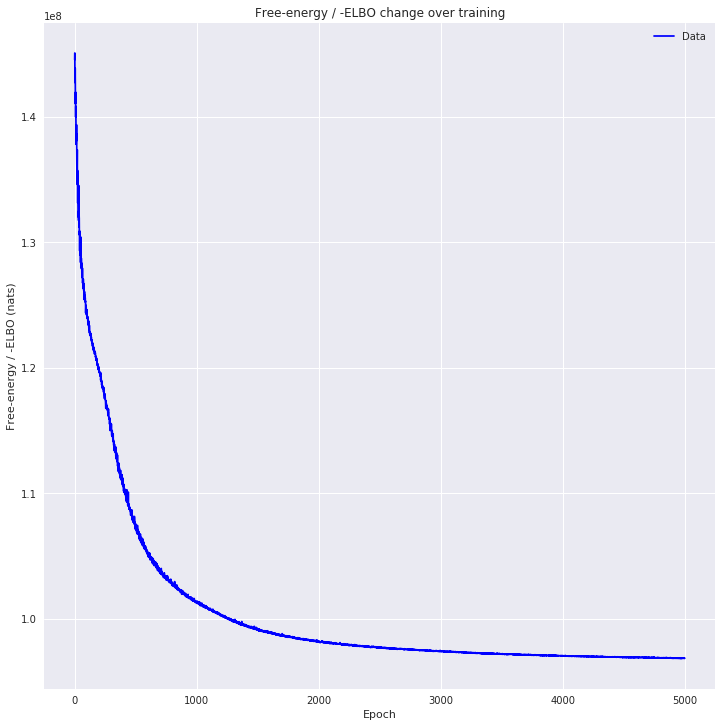

In [10]:
utils.plot_losses(losses)

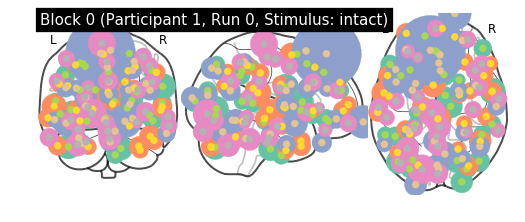

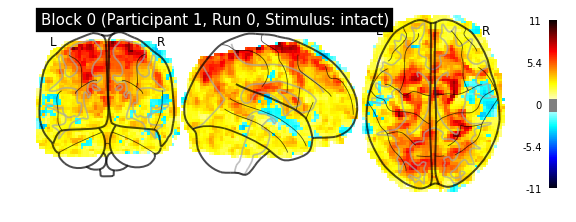

11/13/2018 20:17:34 Reconstruction Error (Frobenius Norm): 4.11024512e+03 out of 5.08479834e+03


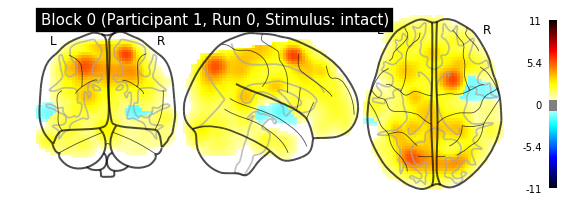

11/13/2018 20:17:49 Reconstruction Error (Frobenius Norm): 4.11156445e+03 out of 5.08479834e+03


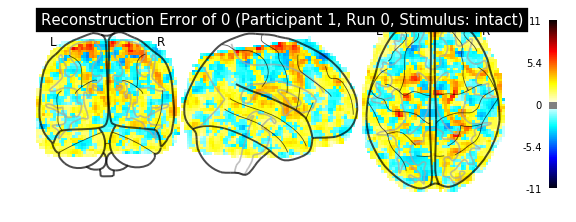

{'weights': tensor([[ 9.0166e-01,  3.1042e+00,  1.2193e+00,  ...,  1.9549e-01,
         -1.5862e-01,  2.6450e+00],
        [ 7.6375e-01,  1.0328e+00, -4.0895e-01,  ...,  4.6196e-01,
         -9.4953e-01,  1.2089e+00],
        [ 1.3625e+00,  5.7086e-01,  8.1434e-01,  ...,  1.3223e-01,
         -1.4264e+00,  9.3419e-02],
        ...,
        [-8.3384e-01, -2.5605e-01,  6.6260e-01,  ..., -5.0496e-01,
          1.7327e-01, -3.4307e-01],
        [ 4.3687e-01, -4.0406e-01, -3.6579e-01,  ...,  4.7973e-01,
          1.8888e+00, -4.8338e-01],
        [ 1.0897e+00, -7.7610e-01, -1.1798e+00,  ...,  7.9797e-01,
          3.2072e+00, -1.6813e+00]]), 'factors': tensor([[ 0.0005,  0.0002,  0.0003,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

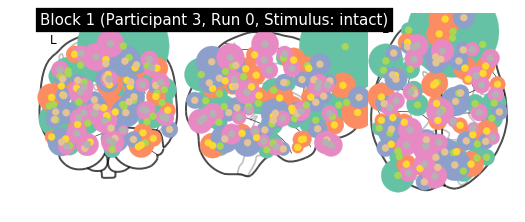

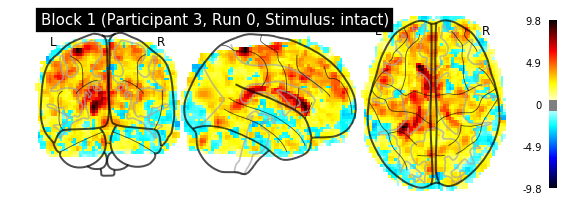

11/13/2018 20:18:20 Reconstruction Error (Frobenius Norm): 4.26889258e+03 out of 5.19534082e+03


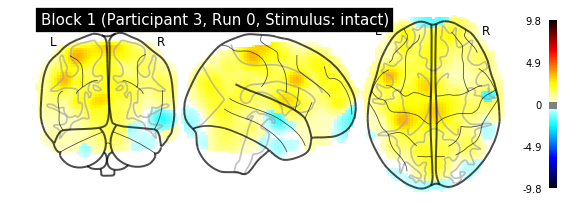

11/13/2018 20:18:35 Reconstruction Error (Frobenius Norm): 4.26952197e+03 out of 5.19534082e+03


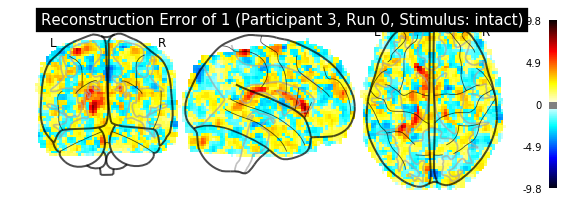

{'weights': tensor([[-1.4075e+00, -3.9973e+00, -4.6778e-01,  ...,  1.3631e+00,
          2.1121e+00, -4.1398e-01],
        [-2.7540e+00, -2.0234e+00, -4.3466e-01,  ..., -1.9646e+00,
          3.2432e-01,  9.4242e-01],
        [-1.4040e+00, -9.1480e-02, -2.8569e-01,  ...,  8.1018e-01,
          7.9107e-01,  1.6388e+00],
        ...,
        [ 3.0723e+00,  8.4136e-01,  9.5633e-01,  ...,  6.6647e-01,
          1.1790e+00, -2.9931e+00],
        [ 2.8161e+00, -4.3328e-02,  9.0788e-01,  ..., -2.2075e+00,
          1.4830e+00, -2.9592e+00],
        [ 2.1640e+00,  1.4844e+00, -3.1099e-01,  ..., -1.2796e+00,
          1.6285e+00, -2.9264e+00]]), 'factors': tensor([[ 0.0138,  0.0078,  0.0088,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0001,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

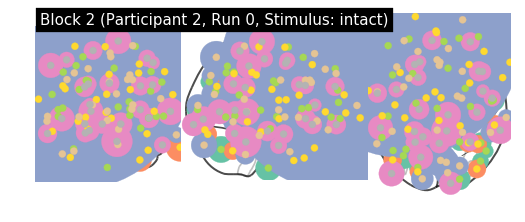

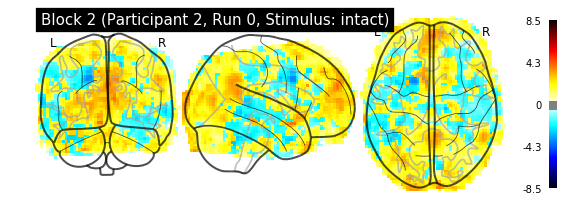

11/13/2018 20:19:07 Reconstruction Error (Frobenius Norm): 3.99098804e+03 out of 5.19533984e+03


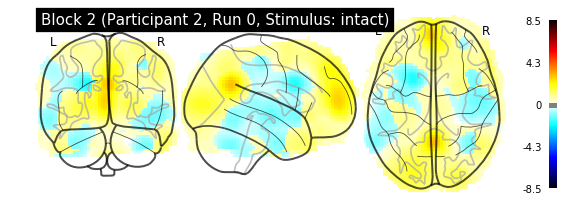

11/13/2018 20:19:22 Reconstruction Error (Frobenius Norm): 3.98927002e+03 out of 5.19533984e+03


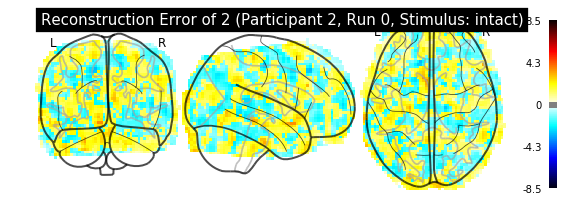

{'weights': tensor([[ 7.8926e-02,  2.5109e-01, -1.3619e+00,  ..., -4.6249e-01,
          7.6544e-01, -2.3416e+00],
        [-1.7615e+00, -1.8041e-01, -1.4369e+00,  ..., -1.4577e+00,
          1.1400e-01, -8.9513e-01],
        [-4.0256e+00, -2.1188e-01, -2.1079e+00,  ..., -8.7526e-01,
         -6.3161e-01, -7.3452e-01],
        ...,
        [-1.3156e+00, -4.4636e-01, -1.7404e+00,  ...,  2.4971e-01,
         -8.6832e-01, -1.2273e-01],
        [ 2.2724e-01, -8.3270e-01, -6.2603e-01,  ..., -5.8234e-02,
         -1.6889e+00, -9.4519e-01],
        [ 2.2874e+00, -1.3262e+00, -1.0470e+00,  ..., -9.8252e-01,
         -1.9833e+00, -1.2821e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0158,  0.0168,  0.0117,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0012,  0.0009,  0.0011],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [11]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    dtfa.plot_reconstruction_diff(b)
    print(dtfa.results(b))

In [12]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


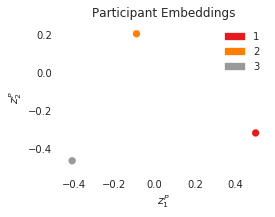

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


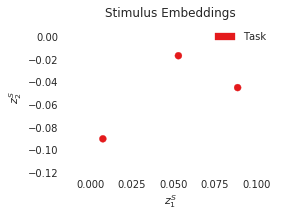

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

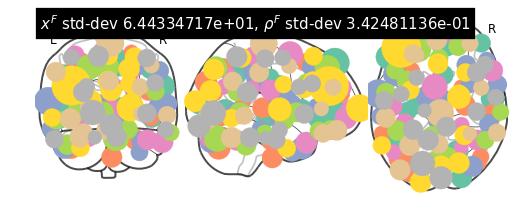

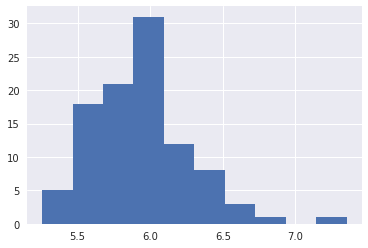

(<nilearn.plotting.displays.OrthoProjector at 0x7f2c00de5c50>,
 tensor([[-47.5670, -54.1467,  36.9927],
         [  5.0964,  14.2825,   0.7193],
         [-32.2691, -23.7450,  -8.7709],
         [ 19.8430, -66.2606,  -0.2641],
         [ 44.0989, -54.6386,  42.3207],
         [-48.1268,  15.7432,   2.2832],
         [ 45.4693,  47.9165,  -9.2515],
         [-52.7331,  33.3530,  -7.4591],
         [ 24.5926, -93.4641,   6.7059],
         [ 57.3621, -10.3741,  24.6346],
         [-24.4407, -18.4037,  34.7368],
         [ 11.5112,  48.6777,   1.4903],
         [  7.3305,  49.0976,  50.0091],
         [  3.6449, -16.6791, -50.0991],
         [ 24.2511,   1.3833,  60.1915],
         [-39.7279, -73.0591, -39.5077],
         [ 57.0480, -26.8956,   2.4865],
         [-34.2230, -68.3629,  44.8677],
         [-25.0397,  56.2838,  16.7435],
         [ 41.9714, -77.6362,  18.3067],
         [-59.0568, -47.2955,   9.5960],
         [-31.1472, -86.3571,  29.3877],
         [ 28.7370, -17.7005, -31.7

In [15]:
dtfa.visualize_factor_embedding()

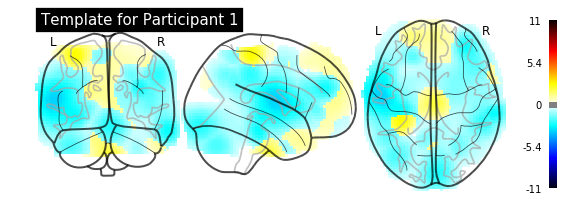

In [16]:
dtfa.plot_subject_template(1)

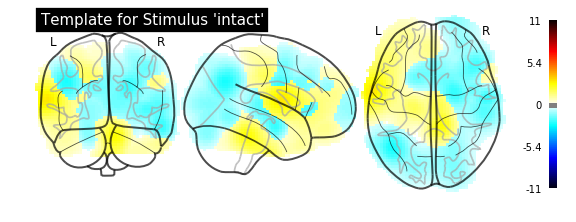

In [17]:
dtfa.plot_task_template('intact')

In [18]:
dtfa.average_reconstruction_error()

11/13/2018 20:19:55 Average reconstruction error (MSE): 7.93970350e-01
11/13/2018 20:19:55 Average data norm (Euclidean): 9.92958210e-01
11/13/2018 20:19:55 Percent average reconstruction error: 0.271422


(0.7939703504381102, 0.9929582103611018, 0.0027142211371127016)